# From Quantitative to Quantum Finance

If you follow Quantum Computing news you may have noticed a strange new player in the world of Quantum Research: the world's largest financial institutions. J.P. Morgan, Wells Fargo, Barclays, Citigroup, Goldman Sachs, and others are all currently pursuing quantum capabilities. According to the [Boston Consulting Group](https://www.bcg.com/publications/2020/how-financial-institutions-can-utilize-quantum-computing), Quantum Computing could add "up to almost $70 billion in additional operating income for banks and other financial-services companies as the technology matures over the next several decades." But what exactly do these banks want with a Quantum Computer - even as the technology is just barely emerging from academic labs? To answer these questions, we are first going to begin with a pivotal moment in wealth management, the advent of Quantitative Finance.
	
Although stock and options trading began as early as the 17th century, the story of Quantitative Finance did not emerge until the 1900s.  Mathematician Louis de Bachelier (1900) is credited with being the first to introduce the idea of using Brownian Motion to model asset pricing, an idea that would go on to form the foundations of 21st century Quantative Finance. Our next stop is in 1953: economist and Nobel-laureate Harry Markowitz’s development of Modern Portfolio Theory (MPT). Markowitz was unique in his approach of using statistical measures in order to maximize portfolio diversification. MPT was so revolutionary in the field of finance that renowned economist Milton Friedman joked that MPT was not economic theory at all but an entirely new field - Markowitz Portfolio Optimization represented a new era for finance.

A key component of MPT is diversification. Most investments are either high risk and high return or low risk and low return MPT creates an optimal mix of the two options by taking into account the investor's personal tolerance for risk

Using MPT we can either set an acceptable risk level and optimize portfolio returns, or set our epected returns and find the minumum risk portfolio possible associated with that return level.


## Markowitz Model
### Efficient Frontier Portfolio Optimisation in Python

We will build a classical Marokowitz Portfolio Optimization model. In exploring the results of our code we will discover what is known as the Efficient Frontier, the boundary that defines optimized portfolios in Markowitz's theory.

In [2]:
#To begin we are going to import the base packages we will need to gather and manipulate stock data

#!pip install pandas_datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas_datareader.data as web   #Datareader allows us to pull real-time stock data from online financial databses. Here we will use Yahoo

Next we will test the Datareader by importing data Netflix's stock data.

In [8]:
data = pd.read_csv('stocks_data.csv', index_col=0)
data.head()

,AAPL,AMZN,GOOGL,FB
Date,,,,
2016-01-04,24.286827,636.989990,759.440002,102.220001
2016-01-05,23.678221,633.789978,761.530029,102.730003
2016-01-06,23.214842,632.650024,759.330017,102.970001
2016-01-07,22.235075,607.940002,741.000000,97.919998
2016-01-08,22.352644,607.049988,730.909973,97.330002


In [17]:
#Pull quote info for Netflix's stock denoted by the symbol 'NFLX'
nflxQuote = web.DataReader('NFLX', data_source='yahoo', start='2016-01-01',
                           end='2017-12-31')
nflxQuote.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,110.000000,105.209999,109.000000,109.959999,20794800,109.959999
2016-01-05,110.580002,105.849998,110.449997,107.660004,17664600,107.660004
2016-01-06,117.910004,104.959999,105.290001,117.680000,33045700,117.680000
2016-01-07,122.180000,112.290001,116.360001,114.559998,33636700,114.559998
2016-01-08,117.720001,111.099998,116.330002,111.389999,18067100,111.389999


Now we want the actual stock portfolio that we are going to optimize, since let's face it, we need more than one investment to optimize! We are going to use the same procedure as above to load in the stock data for Apple, Amazon, Google, and Facebook because if you are going to have a fake portfolio you might as well have fun with it.

In [4]:
#Set the stock symbols, data source, and time range
stocks = ['AAPL','AMZN','GOOGL','FB']
numAssets = len(stocks)
source = 'yahoo'
start = '2016-01-01'
end = '2017-12-31'
data = {}

#Retrieve stock price data and save just the dividend adjusted closing prices
for symbol in stocks:
        data[symbol] = web.DataReader(symbol, data_source=source, start=start, end=end)['Adj Close']


In [6]:
data = pd.DataFrame.from_dict(data)
data.head()

""


We plot both the change in stock price over time as well as the daily change or 'Volatility' of each stock price. *Notice how the prices of the stocks fluctate over time in unpredicatble ways*. This is the essence of the financial optimization problem: using pseudo-random variables to your advantage.

---

<details>
<summary>CHALLENGE: How would you attempt to make sense of 4 data series that seem like a complete roll of the dice?</summary>
<br>
The answer in the case of Markowitz Portfolio Optimization is to compare how each data series changes TOGETHER. For those with a background in statistics, we use the Covariance of our portfolio matrix 
</details>

---

Text(0.5, 0, 'Date')

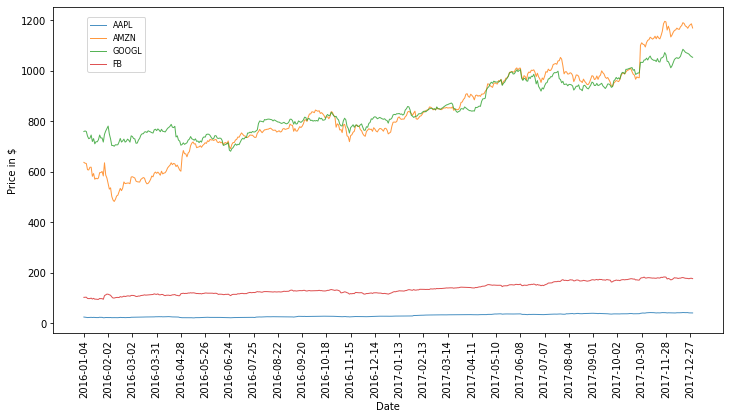

In [9]:
#Plotting the Daily Change of our portfolio
plt.figure(figsize=(12, 6))

#Iterate over the price each of stock per day
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=1, alpha=0.8,label=c)

#Python will attempt to add an x-tick for every data point
#This leads to an undreadable x-axis so we must trim down to every-other data
pos = np.arange(len(data.index))
ticks = plt.xticks(pos[::20], data.index[::20], 
                   rotation=90)

#We add a legend and x-y labels
plt.legend(loc=(.05,.8), fontsize=8)
plt.ylabel('Price in $')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

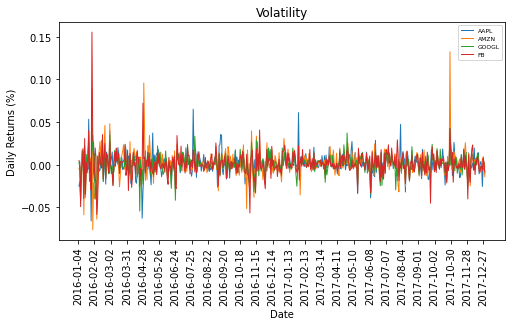

In [10]:
#Plotting the Volatility of our Portfolio
returns = data.pct_change()
plt.figure(figsize=(8, 4))

plt.plot(returns.index, returns['AAPL'], label = 'AAPL', lw=1)
plt.plot(returns.index, returns['AMZN'], label = 'AMZN', lw=1)
plt.plot(returns.index, returns['GOOGL'], label = 'GOOGL', lw=1)
plt.plot(returns.index, returns['FB'], label = 'FB', lw=1)
pos = np.arange(len(returns.index))
ticks = plt.xticks(pos[::20], returns.index[::20],
                   rotation=90) 
plt.legend(loc='upper right', fontsize=6)
plt.title('Volatility')
plt.ylabel('Daily Returns (%)')
plt.xlabel('Date')


### Acceptable Risk
Markowitz Portfolio Theory assumes that investors are risk-averse, meaning they prefer a less risky portfolio to a riskier one for a given level of return; risk aversion implies that most people should invest in multiple asset classes.

The expected return of the portfolio is calculated as a weighted sum of the returns of the individual assets. If a portfolio contained four equally weighted assets with expected returns of 2%, 7%, 10%, and 12%, the portfolio's expected return would be:

EV = (2% x 25%) + (7% x 25%) + (10% x 25%) + (12% x 25%) = 7.75%

This is NOT the case for the risk of a portfolio.

The portfolio's risk is a function of the **variances** of each asset and the **correlations** of each pair of assets. To calculate the risk of a four-asset portfolio, we need each of the four assets' variances and six correlation values, since there are six possible two-asset combinations with four assets. Because of the asset correlations, the total portfolio risk, or standard deviation, is lower than what would be calculated by a weighted sum.

(If you are interested in learning more about the statistics used in this notebook I encourage you to read this [article](https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/150-covariance.pdf) from Stanford).

<figure class = 'Left'>  
    <img src="Cov_Matrix.jpg" alt="General Covariance Matrix" width="200"/>
    <figcaption>General Covariance Matrix</figcaption>
</figure>


<figure class = 'Right'>
    <img src="Variance.jpeg" alt="Low (Left) vs. High (Right) Variance" width="200"/>
    <figcaption>Low (Left) vs. High (Right) Variance</figcaption>
</figure>


---

As discussed above, if we want to pin down the volatility above, we are going to need to analyze not just how each stock price changes, but how they all change together. You can think of this as reducing the degrees of freedom of our data. In order to convert from daily returns and covariance (which comes easily from the data above) we multiple by 250 days since there are approximately 250 open trading days a year.


Let's use this information to find all POSSIBLE stock portfolios combinations that contain our four chosen stocks. We plot these data points as 'Expected Return' vs 'Expected Volatility (Standard Deviation)' below.

We will do this by randomly generating 50,000 portfolio weight/stock combinations using our 4 selected prices. Following the minutia of the code below is unimportant (most of it is staistics and data manipulation) what is important are the takeways from this exercise.

In [11]:
# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()

cov_annual = cov_daily * 250

In [12]:
#Let's display the daily and annual covariance matrices.
#We can do this quickly with the pd.concat command which will
#Add one dataframe onto another
#The Matrix to the right (AAAPL -> FB) is the daily
#The Matrix to the left (AAAPL -> FB) is the annual

cov_display = pd.concat([d.reset_index(drop=True) for d in [cov_daily, cov_annual]], axis=1)
cov_display

,AAPL,AMZN,GOOGL,FB,AAPL,AMZN,GOOGL,FB
0,0.000170,0.000086,0.000072,0.000079,0.042487,0.021559,0.017902,0.019796
1,0.000086,0.000256,0.000111,0.000142,0.021559,0.063983,0.027746,0.035575
2,0.000072,0.000111,0.000126,0.000108,0.017902,0.027746,0.031453,0.026995
3,0.000079,0.000142,0.000108,0.000216,0.019796,0.035575,0.026995,0.054110


In [13]:
#Randomly generating 50,000 stock/weight combinations

port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(stocks)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in stocks]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,AAPL Weight,AMZN Weight,GOOGL Weight,FB Weight
0,0.269033,0.178498,0.169670,0.306493,0.306206,0.217631
1,0.263391,0.169272,0.396159,0.095275,0.248179,0.260387
2,0.280790,0.182015,0.223715,0.180299,0.160393,0.435593
3,0.274868,0.182414,0.144164,0.328140,0.268704,0.258992
4,0.259865,0.180757,0.077616,0.280207,0.392014,0.250163


Let's take a look at the graph:
    Remember, we want to *maximize* Expected Returns while *minimizing* Risk, in this case volatiliity. There is a clearly a subset of all possible portfolios that represent the upper limit of portfolio performance - we call this boundary the **Efficient Frontier**.
    
    The Ffficient Frontier is the line that indicates the efficient set of portfolios that will provide the maximum expected returns for the lowest given level of risk.

    When a portfolio falls to the right of the efficient frontier, it possesses greater risk relative to its predicted return. When it falls beneath the slope of the efficient frontier, it offers a lower level of return relative to risk.

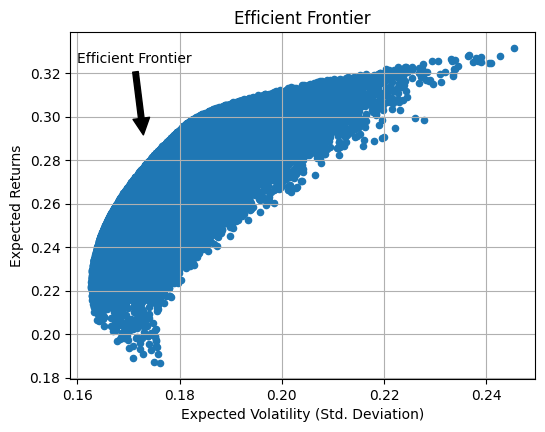

In [14]:
# plot the efficient frontier with a scatter plot
plt.style.use('default')
df.plot.scatter(x='Volatility', y='Returns', figsize=(6, 4.5), grid=True)
plt.xlabel('Expected Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.annotate('Efficient Frontier', xy=(0.173,0.29), xytext=(0.16, 0.325),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.show()

Now that we understand the Efficient Frontier, it is finally time to find our maximized portfolios according to the Markowitz Optimization Model. We have done all of the hard work above by calculating the Covariance Matrix, Expected Returns, and Volatility above, therefore, we simply run our calculations, save the results, and use Panda's latent ability to locate extrema within a datafrane.

The next step then is to define the parameter Panda's must optimize. It turns out that this metric is the **Sharpe Ratio** which describes the excess return you are receiving for the extra volatility you accept by holding a riskier asset.
______________________________________________________________________________________________________________
Sharpe Ratio$ = \frac{R_p-R_f}{\sigma_p}$
$\\$
$R_p = $ Expected Portfolio Return, 
$R_f = $ Risk Free Rate, 
$\sigma_p = $ Portfolio Standard Deviation

______________________________________________________________________________________________________________
The code below translates our calculations above into functions to carry out on all possible portfolio combinations and subsequently finds the portfolios that
1. Maximize the Sharpe Ratio
2. Minimize Volatility

In [15]:
#generate our anual portfolio results and standard deviation
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *250
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(250)
    return std, returns

#generate our random portfolios by assigning random weights to our 50,000 portfolios
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev #Calculating the Sharpe Ratio in this Step
    return results, weights_record


#convert to percent change and average
#this reformats the data into a form that is more illustrative of the evolution of our portfolios
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.017  #the theoretical rate of return of an investment with zero risk.



#Next we will define a function to aesthetically display our results below
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualized Return:", round(rp,2))
    print ("Annualized Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualized Return:", round(rp_min,2))
    print ("Annualized Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)    
    
    
    plt.figure(figsize=(8, 5.6))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='x',color='b',s=400, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='x',color='r',s=400, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns')
    plt.legend(labelspacing=1)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.3
Annualized Volatility: 0.18


             AAPL   AMZN  GOOGL     FB
allocation  43.47  26.75   0.29  29.49
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.22
Annualized Volatility: 0.16


             AAPL  AMZN  GOOGL    FB
allocation  34.45  1.24  58.58  5.73


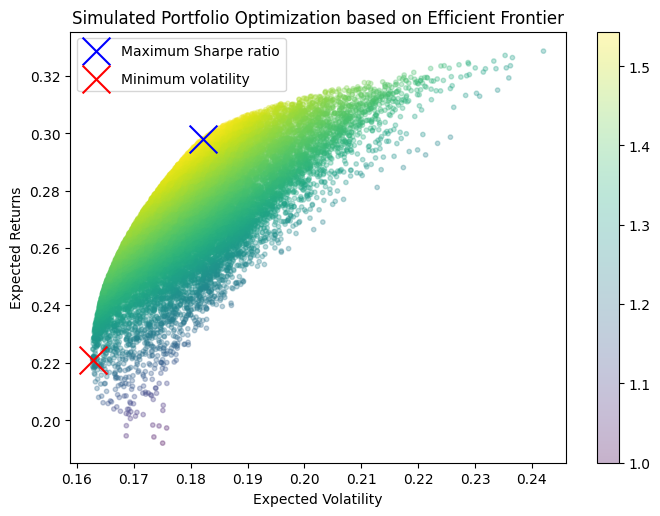

In [16]:
#run the display function created above
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Since its introduction, MPT has been surpassed by many theories and models that correct some its assumptions (such as the risk-adverse investor), account for more variables, and posses greater mathematical sophistication. However, it is difficult to argue against Markowitz's work as a landmark moment in quantitative finance. His work on MPT, although simple, opened the flood gates for what today has become a prominent player in the world of finance.

We will very quickly look at one such quantitative model that leverages advances in mathematics: the Black-Scholes-Merton Model for options pricing.

## Black-Scholes-Merton Model
### Options Pricing

Previously we worked with stock information, however, not all securities operate in the same manner. **Options**, are contracts that grant the buyer either the right to buy (call) or sell (put) the underlying asset at a specific price on or before a certain date.

Options are a method for investors to add flexibility to their portfolio. Options can create leverage, can be used as a hedge bet, and can even generate recurring income. The downside is that given the time-dependent nature of options trading, they can carry increased risk to the investor - thus prompting the creation of a mathematical model to more consistently predict options pricing.

The BSM formula estimates the prices of call and put options, and was the first widely adopted mathematical formula to do so. Previously, options traders didn't possess a consistent mathematical way to value options, and empirical evidence has shown that price estimates produced by this formula are close to observed prices.

The BSM model does this by solving the Partial-Differential-Equation below, which is derived from Stochastic Calculus and the modeling of Brownian Motion - in other words, it is an equation that seeks to model pseudo-random behavior.

Much like MPT utilized covariance to analyze pseudo-random variable, the BSM model is also seeking to understanding unpredictable processes. The difference lies in their methods and application.

Myron Scholes and Robert Merton won the 1997 Nobel Prize in Economists.

### BSM Formula:

$\frac{\partial \mathrm C}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm C}{\partial \mathrm C^2}
	+ \mathrm r \mathrm S \frac{\partial \mathrm C}{\partial \mathrm S}\ =
	\mathrm r \mathrm C $
    
    
$\mathrm C(\mathrm S,\mathrm t)= \mathrm N(\mathrm d_1)\mathrm S_t - \mathrm N(\mathrm d_2) \mathrm K \mathrm e^{-rt}$

- C = Call option price 
- S$_t$ = Current stock price
- K = Strike price of the option
- r = Risk-free interest rate (a number between 0 and 1)
- $\sigma$ = Volatility of the stocks return (a number between 0 and 1)
- t = Time to option maturity (in years)
- N = normal cumulative distribution function

$\mathrm d_1= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r + \frac{\sigma^2}{2} \right) \right]$

$\mathrm d_2= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r - \frac{\sigma^2}{2} \right) \right]$

$N(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} \mathrm e^{-\frac{1}{2}z^2} dz$

In [17]:
from datetime import datetime
from scipy.stats import norm
from pandas import DataFrame

In the next two cells we define $d_1, d_2$, and the put/call functions of the BSM Model. These are exactly the equations above converted into a language python can use to compute.

In [18]:
def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2.)*T)/(sigma*np.sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

In [19]:
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

We are going to again use Datareader to build a dataframe to price Netflix stock options for an option that expires on December 18th, 2022.

In [24]:
stock = 'NFLX'
expiry = '12-18-2022'
strike_price = 370

#set the start date as today
today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

#pull the stock data from yahoo
df = web.DataReader(stock, 'yahoo', one_year_ago, today)

#sort by date and drop any NA values
df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

#compute the variance of the data
#calculate the call price defined above
sigma = np.sqrt(252) * df['returns'].std()
uty = (web.DataReader(
    "^TNX", 'yahoo', today.replace(day=today.day-1), today.day)['Close'].iloc[-1])/100
lcp = df['Close'].iloc[-1]
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

df.head()
print('The Option Price is: ', bs_call(lcp, strike_price, t, uty, sigma))

KeyError: 'Date'

The cell below builds BSM model functions to return the volatility of an option and applies it to the Netflix test stock.

In [21]:
#Again, these are the same as the questions in the BSM intro, just translated into python
def call_implied_volatility(Price, S, K, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = S * \
            norm.cdf(d1(S, K, T, r, sigma))-K*np.exp(-r*T) * \
            norm.cdf(d2(S, K, T, r, sigma))
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

def put_implied_volatility(Price, S, K, T, r):
    sigma = 0.001
    while sigma < 1:
        Price_implied = K*exp(-r*T)-S+bs_call(S, K, T, r, sigma)
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

print("Implied Volatility: " +
      str(100 * call_implied_volatility(bs_call(lcp, strike_price, t, uty, sigma,), lcp, strike_price, t, uty,)) + " %")


NameError: name 'lcp' is not defined

Now we can apply to model to our 4 stocks from earlier.

In [186]:
options = {}
volatility = {}
for symbol in stocks:
    df = web.DataReader(symbol, 'yahoo', one_year_ago, today)
    df = df.sort_values(by="Date")
    df = df.dropna()
    df = df.assign(close_day_before=df.Close.shift(1))
    df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)
    sigma = np.sqrt(252) * df['returns'].std()
    uty = (web.DataReader(
        "^TNX", 'yahoo', today.replace(day=today.day-1), today)['Close'].iloc[-1])/100
    lcp = df['Close'].iloc[-1]
    options[symbol] = bs_call(lcp, strike_price, t, uty, sigma)
    volatility[symbol] = str(100 * call_implied_volatility(bs_call(lcp, strike_price, t, uty, sigma,), lcp, strike_price, t, uty,)) + " %"
    
print('Call Price:')
options
print(80*'-')
print('\n')
print('Implied Volatility:')
volatility

{'AAPL': 0.019248659480856134,
 'AMZN': 2939.292947751972,
 'GOOGL': 2421.36301611135,
 'FB': 32.23937616390607}

Now that we appreciate the power of having a computer by our side when making investments, we understand how impactful an operating-scale quantum computer would be to any financial competitor.

## Quantum Financial Optimization

Quantum computing is a world of high returns and high risks, which happen to be the specialty of investors and financial services. Ultimately, trading stocks and options is an arena defined by fierce competition where success is decided by a microsecond of difference. Above we used classical computing to wrangle 4 stocks with a total of 2,000 original stock price data points, and we saw how difficult it is to predict the volatility of such a portfolio. Now imagine instead, of four stocks we are managing 400, and instead of analyzing stock prices by the day, we want to analyze them by the *second*. It is easy to picture the benefits of having qubits at your disposal.

A Quantum Computer is well suited to this task because above all, Quantum Computing excels at parallel computations - the exact tool needed to process millions of pseudo-random variable with billions of dollars on the line. In other words, to neglect the emergence of Quantum Finance would be to play basketball in Chuck Taylors while everyone else is playing in Air Jordans.
______________________________________________________________________________________________________________

Below, we are going to write a Quantum Portfolio Optimization (QPO) algorithm you can run today using the Qiskit libraries. We are also going to compare this to a classical method to see if we are indeed generating useful results.


To begin we will load in our needed packages and reload out stock data

In [32]:
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.finance.applications.ising import portfolio
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.finance.data_providers import RandomDataProvider
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import COBYLA

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [33]:
data.head()

,AAPL,AMZN,GOOGL,FB
Date,,,,
2016-01-04,24.286827,636.989990,759.440002,102.220001
2016-01-05,23.678221,633.789978,761.530029,102.730003
2016-01-06,23.214842,632.650024,759.330017,102.970001
2016-01-07,22.235075,607.940002,741.000000,97.919998
2016-01-08,22.352644,607.049988,730.909973,97.330002


## Begin QPO

We want to solve the following mean-variance portfolio optimization problem for $n$ assets:

$\begin{aligned}
\min_{x \in \{0, 1\}^n}  q x^T \Sigma x - \mu^T x\\
\text{subject to: } 1^T x = B
\end{aligned}$

- $x \in \{0, 1\}^n$: Binary vector denoting chosing assets,
- $\mu \in \mathbb{R}^n$: Asset Expected Returns,
- $\Sigma \in \mathbb{R}^{n \times n}$: Asset Covariance,
- $q > 0$: Risk tolerance of the investor
- $B$: Budget, i.e. the number of assets to be selected out of $n$.

Such That:
- the vector of portfolio weights is normalized (=1),
- the full budget $B$ has to be spent: we must choose exactly $B$ assets.

This problem is similar to the Sharpe Ratio in that it weights expected returns against volatility
________________________________________________________________________________________________________________
We are going to use the Qiskit [Variational Quantum Eigensolver (VQE)](https://qiskit.org/textbook/ch-applications/vqe-molecules.html#varmethod) to optimize the same portfolio as before in the classical examples. In a nutshell, VQE uses the variational principle of quantum mechanics to find the minimum eigenvalue of a given operator.

VQE is a great quantum algorithm to use because it excels at optimizing over search spaces with a large number of local minima. Avoiding local minima is an incredibly important ability for our algorithm since it is easy for simplistic optimizers to become 'trapped' in these local minima and  miss the true global minimum of the search space.

Our portfolio space clearly contains multiple local minima and VQE is therfore well suited. It is not, however, the only choice of quantum optimizer. Quantum Approximate Optimization Algorithm (QAOA) is another quantum optimizer that would perform just as well, or better than VQE. In this notebook we choose VQE over QAOA because the mathematical theory of VQE is slightly simpler to conceptualize and has a more straightfoward connection to quantum mechanics than QAOA.

---
In the case of a state described by a Hamiltonian H, VQE gives the ground state of the specified system.

We can express the variational principle mathematically as:
$\lambda_{min} = \langle{H}\rangle_{\psi} = \left\langle \psi \middle| H \middle| \psi \right\rangle =  \sum_{i=1}^{N} \lambda_{i}|\left\langle \psi_i \middle| \psi \right\rangle|^2$

Our operator will be built using the Qiskit_Finance package and will convert the above mean-variance problem into an operator for which we can find the minimum eigenvalue and subsequently eigenvector which will be our optimum portfolio! It does this by modeling the problem as an Ising Hamiltonian. Although that subject is deserving of its own blog, just think of it as creating a Hamiltonian defined in binary terms (on/off, 0/1).

We next need to calculate the mean and covariance of our stock data. Thankfully, Pandas Dataframes has a built-in function we can call to calculate the mean price of each stock as well as the covariance matrix.

In [27]:
#Retrieve the mean and covariance matrix of the data
mu = data.mean()
sigma = data.cov()

In [28]:
print('MU:','\n',mu)
print('\n', 80*'-')
print('SIGMA:','\n',sigma)

MU: 
 AAPL      30.096189
AMZN     833.578032
GOOGL    851.317635
FB       136.766720
dtype: float64

 --------------------------------------------------------------------------------
SIGMA: 
              AAPL          AMZN         GOOGL           FB
AAPL    40.843961    995.007772    656.919581   147.323755
AMZN   995.007772  28000.693276  16831.350250  3825.909816
GOOGL  656.919581  16831.350250  11337.098379  2443.373784
FB     147.323755   3825.909816   2443.373784   581.653846


Now we set the Risk Factor (q) of our investor, as well as the number of stocks (assets) we will optimize over. The number of assets is also the number of qubits initiated in the computation.

Finally, we use the portfolio module of Qiskit_Finance to generate our mean-variance operator, here represented by the variable $Op$.

In [34]:
q = 0.5                  # set risk factor
budget = numAssets // 2  # set budget --> numAssets = 4 is the same as defined in our Markowitz Model
penalty = numAssets      # set parameter to scale the budget penalty term

#Generate our Mean-Variance Operator
Op, offset = portfolio.get_operator(mu, sigma.values, q, budget, penalty)

This cell is simply to organize the data for optimizations as well as print the final results in a way we can easily understand.

In [30]:
def index_to_selection(i, numAssets):
    s = "{0:b}".format(i).rjust(numAssets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(numAssets))])
    return x

def print_result(result):
    selection = sample_most_likely(result.eigenstate)
    value = portfolio.portfolio_value(selection, mu, sigma, q, budget, penalty)
    print('Optimal: selection {}, value {:.4f}'.format(selection, value))
    eigenvector = result.eigenstate if isinstance(result.eigenstate, np.ndarray) else result.eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Full result ---------------------')
    print('selection\tvalue\t\tprobability')
    print('---------------------------------------------------')
    for i in i_sorted:
        x = index_to_selection(i, numAssets)
        value = portfolio.portfolio_value(x, mu, sigma, q, budget, penalty)
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))


Let's first run the classical NumPy minimum eigensolver function from Qiskit on our $Op$ operator. This algorithm will run a classical search through viable eigenfunctions to minimize the eigenvalue.

In [35]:
#Create our NumPyMinEigensolver
classical_eigensolver = NumPyMinimumEigensolver(Op)
classical_result = classical_eigensolver.run()

#Use our pretty printing function
print_result(classical_result)

Optimal: selection [1 0 0 0], value -5.6742

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
 [1 0 0 0]	-5.6742		1.0000
 [1 1 1 1]	43044.2711		0.0000
 [0 1 1 1]	41242.6942		0.0000
 [1 0 1 1]	8213.2347		0.0000
 [0 0 1 1]	7414.6655		0.0000
 [1 1 0 1]	18283.3959		0.0000
 [0 1 0 1]	17146.7386		0.0000
 [1 0 0 1]	291.7097		0.0000
 [0 0 0 1]	158.0602		0.0000
 [1 1 1 0]	36461.6036		0.0000
 [0 1 1 0]	34815.3504		0.0000
 [1 0 1 0]	5464.4769		0.0000
 [0 0 1 0]	4821.2316		0.0000
 [1 1 0 0]	14152.1022		0.0000
 [0 1 0 0]	13170.7686		0.0000
 [0 0 0 0]	16.0000		0.0000


Note that due to the simplicity of the model we are not choosing fractional weights for each stock in the portfolio, we are merely generating a binary decision vector, $x \in \{0, 1\}^n$, where 1 represents and investment and 0 does not - this follows from the construction of the mean-variance hamiltonian. Also note that the 'Value' in this case is the solution to the mean-variance problem we wish to minimize. Therefore, our results show that the optimal portfolio contains a single investment, AAPL.

In [36]:
#Examining the value, expected value, and volatility (variance) of our optimal selection

value = portfolio.portfolio_value([1,0,0,0], mu, cov_annual, q, budget, penalty)
expected_value = portfolio.portfolio_expected_value([1,0,0,0], mu)
volatility = portfolio.portfolio_variance([1,0,0,0], sigma)

print('Value:', value, '\n',
     'Expected Value:', expected_value, '\n',
     'Volatility:', volatility)

Value: -26.074946051693672 
 Expected Value: 30.09618941927051 
 Volatility: 40.843960982233845


Let's now compare that to the results we get from using Qiskit's Variational Quantum Eigensolver.

## VQE
Since we are running a quantum algorithm, we must utilize a Qiskit backend in order to simulate the effects of a quantum computer. There are different backends you can use other than Aer.

VQE utilizes a classical optimizer to search through the possible eigenfunction trials states of the Hamiltonian. We will use the Constrained Optimization By Linear Approximation optimizer, or COBYLA, which is already built into Qiskit_Finance.

Next we set a random seed (in order to push the VQE towards the global minimum), intialize our qubits  using the TwoLocal command (printed below), and use the VQE function to create our quantum instance for quantum simulation to run.

Finally we run our VQE instance, optimize our portfolio on the Qiskit backend, and print our results!

In [51]:
#Create the Qiskit backend in order to run our quantum experiment
backend = Aer.get_backend('statevector_simulator')
#Set the random seed that will be used to randomize eigenvectors
seed = 22

#Cobyla is the classicla optimizer we will use in the VQE algo
cobyla = COBYLA()
cobyla.set_options(maxiter=500)
#TwoLocal initiates qubit entanglement
ry = TwoLocal(Op.num_qubits, 'ry', 'cz', reps=3, entanglement='full')
#The VQE function creates the VQE algorithm on our Qiskit backend
vqe = VQE(Op, ry, cobyla)
vqe.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = vqe.run(quantum_instance)


print('What the TwoLocal Command does to entangle the Qubits used in the computation:')
print(ry)
print('-'*80)
print('\n')
print_result(result)

What the TwoLocal Command does to entangle the Qubits used in the computation:
     ┌──────────┐            ┌──────────┐                                 »
q_0: ┤ Ry(θ[0]) ├─■──■─────■─┤ Ry(θ[4]) ├─────────────────■───────■─────■─»
     ├──────────┤ │  │     │ └──────────┘┌──────────┐     │       │     │ »
q_1: ┤ Ry(θ[1]) ├─■──┼──■──┼──────■──────┤ Ry(θ[5]) ├─────■───────┼──■──┼─»
     ├──────────┤    │  │  │      │      └──────────┘┌──────────┐ │  │  │ »
q_2: ┤ Ry(θ[2]) ├────■──■──┼──────┼───────────■──────┤ Ry(θ[6]) ├─■──■──┼─»
     ├──────────┤          │      │           │      ├──────────┤       │ »
q_3: ┤ Ry(θ[3]) ├──────────■──────■───────────■──────┤ Ry(θ[7]) ├───────■─»
     └──────────┘                                    └──────────┘         »
«     ┌──────────┐                                  ┌───────────┐             »
«q_0: ┤ Ry(θ[8]) ├──────────────────■───────■─────■─┤ Ry(θ[12]) ├─────────────»
«     └──────────┘┌──────────┐      │       │     │ └───────────┘┌───────────

Ok cool, we just succesfully ran a Quantum Financial Optimization Algortithm! But... what does this mean? Well, for one, quantum algorithms report *probabilistic* rather than deterministic results. Thus, if we ran our optimization program on an actual quantum computer we would receive the above result only a fraction of the time (which is reported to the right of the vector values).

We can visualize these results in order to but it in context of our Markowitz portfolio optimization. We begin by creating a vector contain (almost) all of the possible selection vectors. I have removed [0 0 0 0] and [1 1 1 1] because they skew the comparison dramatically. The scatter plot below plots the Expected Returns vs Expected Volatility of each selection. Notice that we re-use the returns_annual and cov_annual variable from the Markowitz model. We do this specifically because we want the returns and volatility in daily percentages. You can see how in our simplified model, volatility scales with expected returns - thus highlighting the benefit of portfolio diversification.

Finally, we plot our VQE selections against our Markowitz search space. Although the VQE results produce a portfolio with a worse Sharpe Ratio than the optimal portfolio produced by the Markowitz model, our VQE model produced comparabale results with a search space of 16 portfolios compared to the 50,000 searched in our Markowitz model!

In [38]:
vec = [[1,0,0,0],
       [0,1,1,1], 
       [1,0,1,1], 
       [0,0,1,1], 
       [1,1,0,1],
       [0,1,0,1],
       [1,0,0,1],
       [0,0,0,1],
       [1,1,1,0],
       [0,1,1,0],
       [1,0,1,0],
       [0,0,1,0],
       [1,1,0,0],
       [0,1,0,0]]

Text(0.5, 1.0, 'Returns vs Volatility for Each Choice Vector in the QPO')

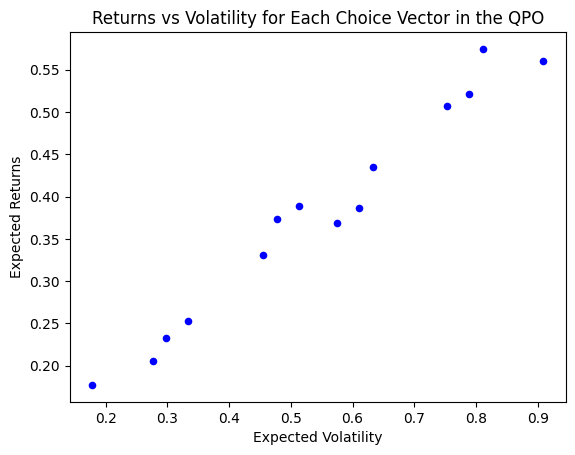

In [84]:
for x in vec:
        expected_value = np.dot(x, returns_annual)
        volatility = np.sqrt(np.dot(np.array(x).T, np.dot(cov_annual, x)))
        sct = {'Vec': x,
               'EV': expected_value,
              'Vol': volatility}
        plt.scatter(expected_value, volatility, marker='o', s=20, color = 'b')
        
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.title('Returns vs Volatility for Each Choice Vector in the QPO')
        

In [85]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualized Return:", round(rp,2))
    print ("Annualized Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualized Return:", round(rp_min,2))
    print ("Annualized Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Optimal NumpyEigensolver Portfolio Allocation\n")
    print ("Annualized Return:", )
    print ("Annualized Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualized Return:", round(rp_min,2))
    print ("Annualized Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation) 
    
    
    plt.figure(figsize=(8, 5.6))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='viridis', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='x',color='b',s=400, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='x',color='r',s=400, label='Minimum volatility')
    for x in vec:
        expected_value = np.dot(x, returns_annual)
        volatility = np.sqrt(np.dot(np.array(x).T, np.dot(cov_annual, x)))
        plt.scatter(expected_value, volatility, marker='o', s=15, color = 'b')
    ev_result = np.dot(sample_most_likely(result.eigenstate), returns_annual)
    vol_result = np.sqrt(np.dot(np.array(sample_most_likely(result.eigenstate)).T,
                                np.dot(cov_annual, sample_most_likely(result.eigenstate))))
    np_ev_result = np.dot([1,0,0,0], returns_annual)
    np_vol_result = np.sqrt(np.dot(np.array([1,0,0,0]).T, 
                                   np.dot(cov_annual, [1,0,0,0])))
    plt.scatter(ev_result, vol_result, marker='x', s=400, color = 'y', label='Optimal VQE')
    plt.scatter(np_ev_result, np_vol_result, marker='x', s=400, color = 'k', label='Optimal NP')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier with Quantum Results')
    plt.ylim(top = 0.40)
    plt.xlim(right = 0.70)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns')
    plt.legend(labelspacing=1)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.3
Annualized Volatility: 0.18


             AAPL   AMZN  GOOGL     FB
allocation  43.06  29.92   0.04  26.98
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.22
Annualized Volatility: 0.16


             AAPL  AMZN  GOOGL   FB
allocation  33.46  1.08  58.86  6.6


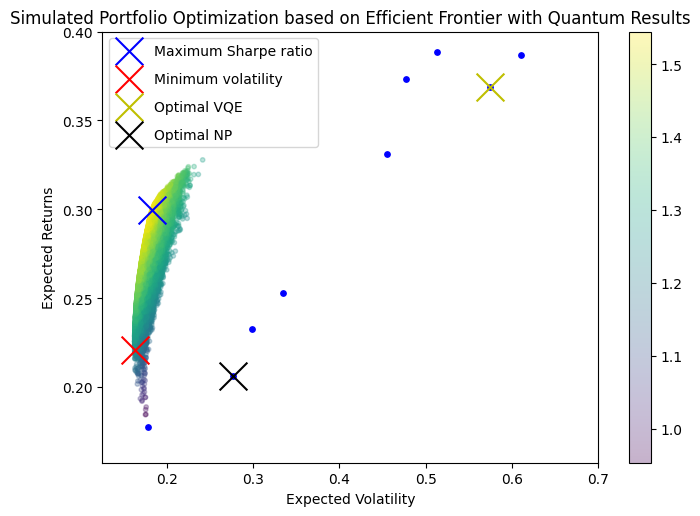

In [86]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

The search space of the quantum algorithms (blue dots) is smaller and outside of the portfolios defined by our previous expected frontier search space. This is becasue the efficient frontier simulation created portfolios that gave random weight to all 4 stock in the portfolio, while the quantum search space only uses binary yes/no investment vectors. Therefore, the portfolios being optimized by the NumPy Eigensolver and the VQE algorithm are far less diversified. This leads to incredibly high volatility compared to portfolios within the efficient frontier that produce the same returns.

We also see the development

Also note that since the VQE algorithm returns a probablistic portfolio vector, the VQE and Numpy Eigensolver results may not be equal for every simulation.

---

On the trading floor, computed variables increase exponentially and likewise need to be met with exponential computing power - precisely what Quantum Computing promises to deliver.

Often, while mired in the complex problems of the present, it is easy to lose sight of Quantum Computing's future. However, Quantum Finance is one area where real, market-altering change is occurring overnight. Just as banks are preparing themselves to play a new, distinctly Quantum game, everyone invested in Quantum Computing should prepare for the day qubits dominate Wall Street. 

# Using Terra

In [43]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo

ModuleNotFoundError: No module named 'qiskit_finance'

In [ ]:
q = 0.5                   # set risk factor
budget = numAssets // 2  # set budget
penalty = numAssets      # set parameter to scale the budget penalty term

portfolio = PortfolioOptimization(expected_returns=mu, 
                                  covariances=sigma, 
                                  risk_factor=q, 
                                  budget=budget, 
                                  penalty=penalty)
Op = portfolio.to_quadratic_program()
Op

In [22]:
classical_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(classical_eigensolver)

classical_result = exact_eigensolver.solve(Op)

print_result(classical_result)

NameError: name 'MinimumEigenOptimizer' is not defined

In [ ]:
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 2222
backend = Aer.get_backend('statevector_simulator')

cobyla = COBYLA()
cobyla.set_options(maxiter=500)
ry = TwoLocal(num_assets, 'ry', 'cz', reps=3, entanglement='full')
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
vqe_mes = VQE(ry, optimizer=cobyla, quantum_instance=quantum_instance)
vqe = MinimumEigenOptimizer(vqe_mes)
vqe_result = vqe.solve(Op)

print_result(vqe_result)